# Exploratory Data Analysis

---

#### Data scraped from SGCarMart. Refer to notebook "Scraping from SGCarMart" for the scraping process and notebook "Data Cleaning" for the data cleaning process.

In [1]:
import pandas as pd
import random
import csv
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from datetime import date

In [2]:
car_df= pd.read_csv('./car_df_cleaned.csv')
car_df= car_df.drop('Unnamed: 0', axis=1)

In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10482 entries, 0 to 10481
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                10482 non-null  object 
 1   Posted On          10482 non-null  object 
 2   car_make           10482 non-null  object 
 3   Seller             10482 non-null  object 
 4   seller_type        10482 non-null  int64  
 5   Price              10482 non-null  float64
 6   dereg_value        10482 non-null  float64
 7   COE                10482 non-null  float64
 8   Manufactured       10482 non-null  int64  
 9   car_age            10482 non-null  int64  
 10  road_tax_per_yr    10482 non-null  float64
 11  OMV                10482 non-null  float64
 12  ARF                10482 non-null  float64
 13  total_mileage      10482 non-null  float64
 14  Total_COE_left     10482 non-null  int64  
 15  engine_cap_cc      10436 non-null  float64
 16  curb_weight_kg     104

In [4]:
corr_matrix= car_df.corr().round(2)
corr_matrix

,seller_type,Price,dereg_value,COE,Manufactured,car_age,road_tax_per_yr,OMV,ARF,total_mileage,...,engine_cap_cc,curb_weight_kg,transmission_type,Power_kw,owner_number,brand_category,price_dereg_ratio,OMV_cat,COE_cat,car_category
seller_type,1.00,-0.01,-0.01,-0.02,0.04,-0.04,-0.05,-0.05,-0.04,-0.03,...,-0.06,-0.05,0.02,-0.05,-0.04,0.05,-0.03,-0.05,-0.04,-0.05
Price,-0.01,1.00,0.88,0.24,0.35,-0.35,0.54,0.79,0.86,-0.41,...,0.60,0.57,0.05,0.66,-0.20,-0.32,0.07,0.44,0.28,0.35
dereg_value,-0.01,0.88,1.00,0.47,0.44,-0.44,0.41,0.67,0.79,-0.45,...,0.52,0.57,0.06,0.65,-0.27,-0.40,-0.14,0.51,0.30,0.40
COE,-0.02,0.24,0.47,1.00,0.23,-0.23,0.12,0.22,0.20,-0.21,...,0.20,0.30,0.07,0.26,-0.18,-0.28,-0.31,0.33,0.18,0.25
Manufactured,0.04,0.35,0.44,0.23,1.00,-1.00,-0.22,0.06,0.10,-0.81,...,-0.10,0.10,0.14,0.09,-0.66,-0.15,-0.22,0.15,-0.07,0.00
car_age,-0.04,-0.35,-0.44,-0.23,-1.00,1.00,0.22,-0.06,-0.10,0.81,...,0.10,-0.10,-0.14,-0.09,0.66,0.15,0.22,-0.15,0.07,-0.00
road_tax_per_yr,-0.05,0.54,0.41,0.12,-0.22,0.22,1.00,0.79,0.74,0.06,...,0.96,0.71,0.03,0.79,0.18,-0.24,0.24,0.47,0.54,0.53
OMV,-0.05,0.79,0.67,0.22,0.06,-0.06,0.79,1.00,0.96,-0.17,...,0.81,0.69,0.06,0.79,-0.01,-0.42,0.19,0.56,0.40,0.49
ARF,-0.04,0.86,0.79,0.20,0.10,-0.10,0.74,0.96,1.00,-0.19,...,0.79,0.68,0.05,0.79,-0.04,-0.40,0.11,0.54,0.40,0.48
total_mileage,-0.03,-0.41,-0.45,-0.21,-0.81,0.81,0.06,-0.17,-0.19,1.00,...,-0.01,-0.14,-0.11,-0.17,0.56,0.15,0.11,-0.18,0.04,-0.03


In [18]:
corr_matrix["Price"].sort_values(ascending= False)

Price                1.00
dereg_value          0.88
ARF                  0.86
OMV                  0.79
Power_kw             0.66
engine_cap_cc        0.60
curb_weight_kg       0.57
road_tax_per_yr      0.54
OMV_cat              0.44
Total_COE_left       0.42
car_category         0.35
Manufactured         0.35
COE_cat              0.28
COE                  0.24
price_dereg_ratio    0.07
transmission_type    0.05
seller_type         -0.01
owner_number        -0.20
brand_category      -0.32
car_age             -0.35
total_mileage       -0.41
Name: Price, dtype: float64

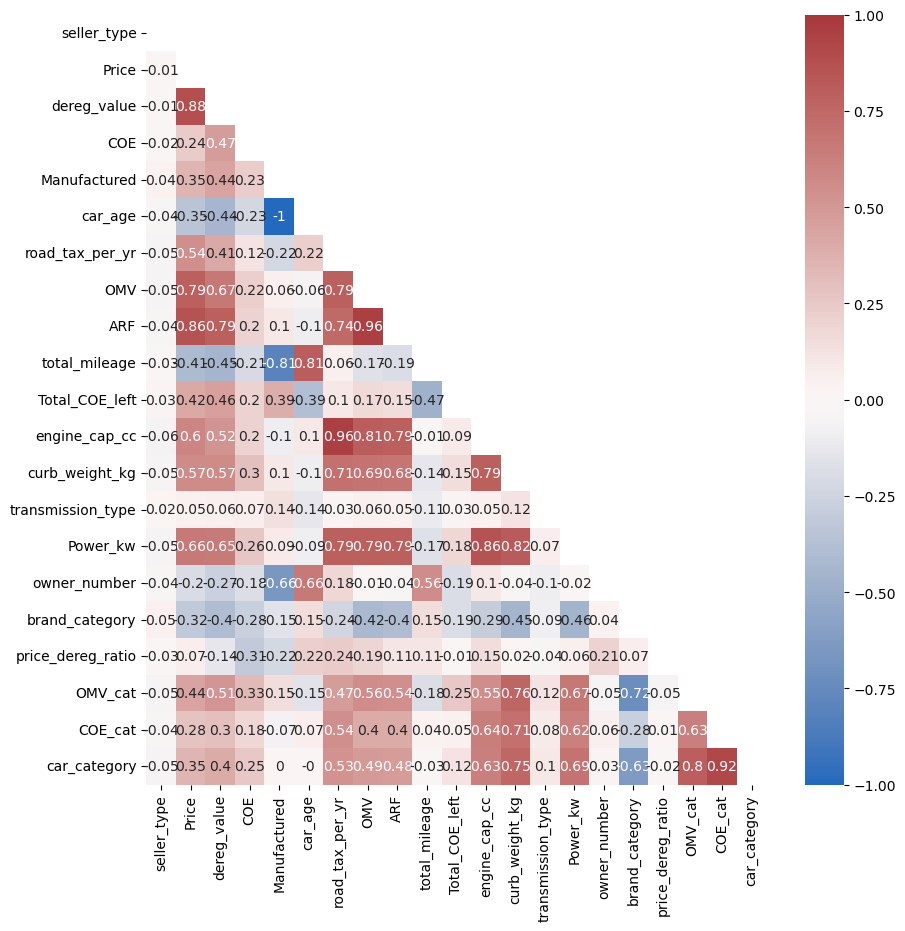

In [5]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

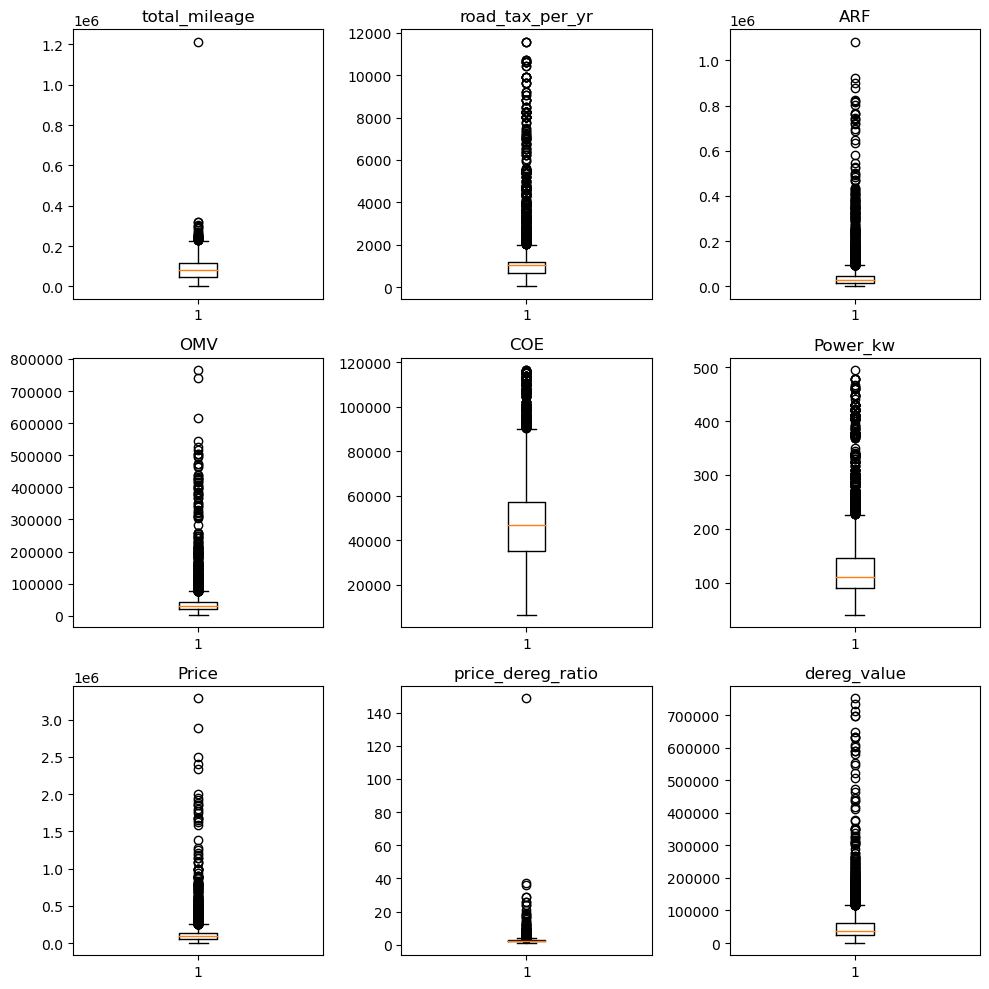

In [6]:
# plot the boxplot matrix
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs[0, 0].boxplot(car_df['total_mileage'])
axs[0, 0].set_title('total_mileage')

axs[0, 1].boxplot(car_df['road_tax_per_yr'])
axs[0, 1].set_title('road_tax_per_yr')

axs[0, 2].boxplot(car_df['ARF'])
axs[0, 2].set_title('ARF')

axs[1, 0].boxplot(car_df['OMV'])
axs[1, 0].set_title('OMV')

axs[1, 1].boxplot(car_df['COE'])
axs[1, 1].set_title('COE')

axs[1, 2].boxplot(car_df['Power_kw'])
axs[1, 2].set_title('Power_kw')

axs[2, 0].boxplot(car_df['Price'])
axs[2, 0].set_title('Price')

axs[2, 1].boxplot(car_df['price_dereg_ratio'])
axs[2, 1].set_title('price_dereg_ratio')

axs[2, 2].boxplot(car_df['dereg_value'])
axs[2, 2].set_title('dereg_value')


# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

In [7]:
car_df['total_mileage'].sort_values(ascending= False)

6788     1213681.0
6386      320156.0
9007      320000.0
10198     305723.0
6654      300000.0
           ...    
6319           9.0
9986           8.0
7266           6.0
4264           1.0
3609           1.0
Name: total_mileage, Length: 10482, dtype: float64

In [8]:
#drop row 6788 as it's total_mileage is an outlier. 

car_df= car_df.drop(index= 6788).reset_index(drop=True)

In [9]:
car_df['price_dereg_ratio'].sort_values(ascending= False).head(15)

10480           inf
6067            inf
1975            inf
6140            inf
10454    148.698885
6139      37.498031
5974      36.199878
5972      28.861482
651       28.790199
5969      26.025499
5971      25.806452
6082      24.135889
10474     24.000000
6074      21.039179
6083      19.300229
Name: price_dereg_ratio, dtype: float64

#### To drop the first 5 rows as they are the outliers. Price to dereg_value ratio indicates how much more the car is valued in the resale market as compared to its scrap value. 

In [10]:
index_to_drop= [10480, 6067, 1975, 6140, 10454]

for i in index_to_drop:
    car_df= car_df.drop(index= i)

In [11]:
# Price has a significant number of outliers. To check how many listings above $500,000. Upon inspection, cars above this value
# seem to be priced much more than their original value. Such cars are mostly Bentleys and Maybach, which are the pinnacle of 
# luxury car brand and their values do not decrease over time. 

car_df[car_df['Price'] > 500000].shape

(113, 28)

In [12]:
# to create a dataframe that exclude listings above $500,000. 

car_df2= car_df[car_df['Price'] < 500000]

In [13]:
# to exclude these brands after EDA in Tableau as they are extreme outliers.

car_brand_to_exclude= ['Rolls-Royce', 'Bentley', 'Maybach']

car_df2= car_df2[~car_df2['car_brand'].isin(car_brand_to_exclude)]

In [14]:
car_df2.shape

(10331, 28)

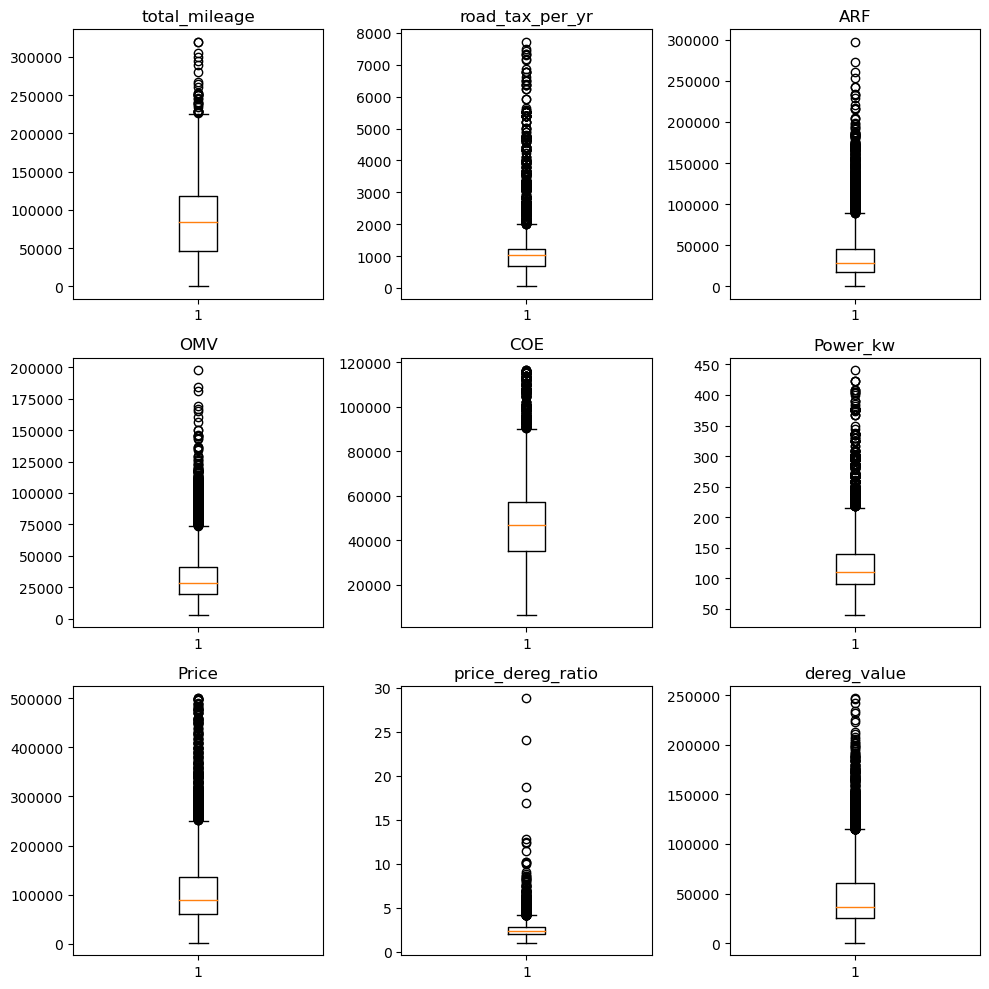

In [15]:
# plot the boxplot matrix
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axs[0, 0].boxplot(car_df2['total_mileage'])
axs[0, 0].set_title('total_mileage')

axs[0, 1].boxplot(car_df2['road_tax_per_yr'])
axs[0, 1].set_title('road_tax_per_yr')

axs[0, 2].boxplot(car_df2['ARF'])
axs[0, 2].set_title('ARF')

axs[1, 0].boxplot(car_df2['OMV'])
axs[1, 0].set_title('OMV')

axs[1, 1].boxplot(car_df2['COE'])
axs[1, 1].set_title('COE')

axs[1, 2].boxplot(car_df2['Power_kw'])
axs[1, 2].set_title('Power_kw')

axs[2, 0].boxplot(car_df2['Price'])
axs[2, 0].set_title('Price')

axs[2, 1].boxplot(car_df2['price_dereg_ratio'])
axs[2, 1].set_title('price_dereg_ratio')

axs[2, 2].boxplot(car_df2['dereg_value'])
axs[2, 2].set_title('dereg_value')

# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

In [16]:
#car_df2.to_csv('car_df_for_modelling.csv')

### strong features can already be identified from the correlation matrix. The rest of the EDA will be done in PowerBI. 